In [1]:
import gymnasium as gym
import numpy as np
import torch
from torch import nn
from tqdm import tqdm
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
from gymnasium.wrappers import RecordEpisodeStatistics, RecordVideo
from IPython.display import display, clear_output

# Device setup (use GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


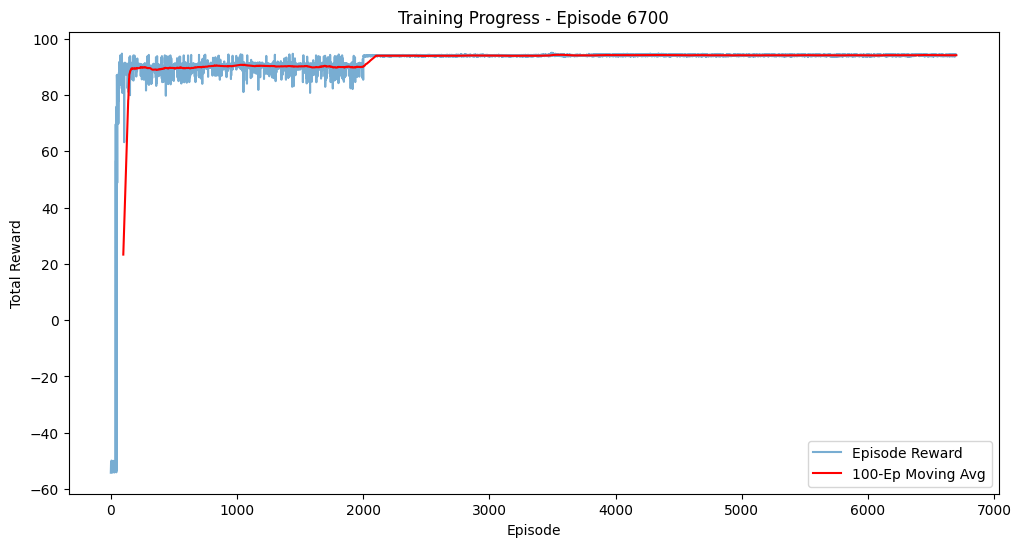

 67%|██████▋   | 6701/10000 [35:01<14:13,  3.87it/s]

Episode 6701: Total Reward: 94.34


 67%|██████▋   | 6702/10000 [35:01<14:22,  3.82it/s]

Episode 6702: Total Reward: 93.67


 67%|██████▋   | 6703/10000 [35:01<13:37,  4.03it/s]

Episode 6703: Total Reward: 94.07


 67%|██████▋   | 6704/10000 [35:01<13:02,  4.21it/s]

Episode 6704: Total Reward: 94.21


 67%|██████▋   | 6705/10000 [35:01<12:29,  4.40it/s]

Episode 6705: Total Reward: 93.98


 67%|██████▋   | 6706/10000 [35:02<12:10,  4.51it/s]

Episode 6706: Total Reward: 94.08


 67%|██████▋   | 6707/10000 [35:02<12:17,  4.47it/s]

Episode 6707: Total Reward: 93.66


 67%|██████▋   | 6708/10000 [35:02<12:15,  4.47it/s]

Episode 6708: Total Reward: 93.94


 67%|██████▋   | 6709/10000 [35:02<12:19,  4.45it/s]

Episode 6709: Total Reward: 94.08


 67%|██████▋   | 6710/10000 [35:03<12:37,  4.34it/s]

Episode 6710: Total Reward: 94.12


 67%|██████▋   | 6711/10000 [35:03<12:40,  4.32it/s]

Episode 6711: Total Reward: 93.75


 67%|██████▋   | 6712/10000 [35:03<12:29,  4.38it/s]

Episode 6712: Total Reward: 94.12


 67%|██████▋   | 6713/10000 [35:03<12:10,  4.50it/s]

Episode 6713: Total Reward: 94.29


 67%|██████▋   | 6714/10000 [35:04<12:14,  4.47it/s]

Episode 6714: Total Reward: 94.34


 67%|██████▋   | 6715/10000 [35:04<12:07,  4.51it/s]

Episode 6715: Total Reward: 93.98


 67%|██████▋   | 6716/10000 [35:04<12:18,  4.45it/s]

Episode 6716: Total Reward: 93.72


 67%|██████▋   | 6717/10000 [35:04<12:02,  4.55it/s]

Episode 6717: Total Reward: 94.24


 67%|██████▋   | 6718/10000 [35:04<12:00,  4.55it/s]

Episode 6718: Total Reward: 94.03


 67%|██████▋   | 6719/10000 [35:05<11:54,  4.59it/s]

Episode 6719: Total Reward: 93.78


 67%|██████▋   | 6720/10000 [35:05<11:55,  4.58it/s]

Episode 6720: Total Reward: 94.18


 67%|██████▋   | 6721/10000 [35:05<11:56,  4.57it/s]

Episode 6721: Total Reward: 94.18


 67%|██████▋   | 6722/10000 [35:05<11:50,  4.61it/s]

Episode 6722: Total Reward: 94.34


 67%|██████▋   | 6723/10000 [35:05<11:57,  4.57it/s]

Episode 6723: Total Reward: 94.31


 67%|██████▋   | 6724/10000 [35:06<11:58,  4.56it/s]

Episode 6724: Total Reward: 93.72


 67%|██████▋   | 6725/10000 [35:06<11:56,  4.57it/s]

Episode 6725: Total Reward: 94.01


 67%|██████▋   | 6726/10000 [35:06<12:07,  4.50it/s]

Episode 6726: Total Reward: 94.36


 67%|██████▋   | 6727/10000 [35:06<12:08,  4.49it/s]

Episode 6727: Total Reward: 94.25


 67%|██████▋   | 6728/10000 [35:07<11:53,  4.59it/s]

Episode 6728: Total Reward: 94.38


 67%|██████▋   | 6729/10000 [35:07<12:11,  4.47it/s]

Episode 6729: Total Reward: 93.64


 67%|██████▋   | 6730/10000 [35:07<12:12,  4.46it/s]

Episode 6730: Total Reward: 94.11


 67%|██████▋   | 6731/10000 [35:07<11:57,  4.56it/s]

Episode 6731: Total Reward: 94.27


 67%|██████▋   | 6732/10000 [35:08<17:03,  3.19it/s]

Episode 6732: Total Reward: 94.09


KeyboardInterrupt: 

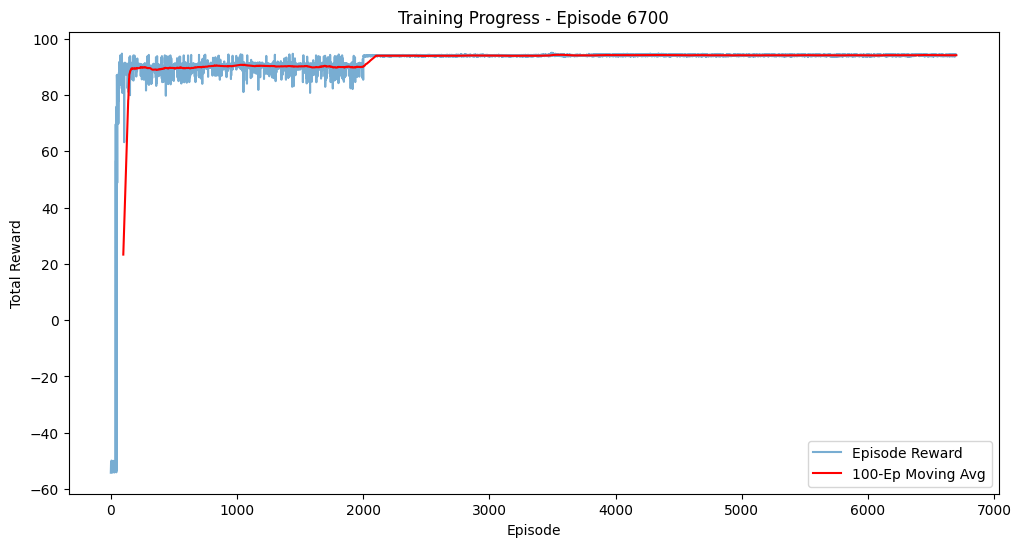

In [ ]:
import gymnasium as gym
import numpy as np
import torch
from torch import nn
from tqdm import tqdm
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
from gymnasium.wrappers import RecordEpisodeStatistics, RecordVideo
from IPython.display import display, clear_output

# Device setup (use GPU if available)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

class Actor(nn.Module):
    def __init__(self, state_dim, action_dim, max_action):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(state_dim,128),
            nn.ReLU(),
            nn.LayerNorm(128),
            nn.Linear(128,128),
            nn.ReLU(),
            nn.LayerNorm(128),
            nn.Linear(128,action_dim),
            nn.Tanh()
        )
        self.max_action = max_action

    def forward(self, state):
        action = self.layers(state) * self.max_action
        return action
    
class Critic(nn.Module):
    def __init__(self, state_dim, action_dim):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(state_dim + action_dim,128),
            nn.ReLU(),
            nn.LayerNorm(128),
            nn.Linear(128,128),
            nn.ReLU(),
            nn.LayerNorm(128),
            nn.Linear(128, action_dim)
        )
    
    def forward(self, state, action):
        sa = torch.cat([state, action], 1)
        Q = self.layers(sa)
        return Q

def polyak_average(net_target, net_source, tau):
    # --- Perform Polyak Averaging Update ---
    # print(f"Performing Polyak update with tau={tau}...")
    with torch.no_grad(): # IMPORTANT: No gradient tracking needed for this update
        # Iterate through the state dictionary of the target network
        target_state_dict = net_target.state_dict()
        source_state_dict = net_source.state_dict()

        for key in target_state_dict:
            if key not in source_state_dict:
                print(f"Warning: Key {key} not found in source state_dict. Skipping.")
                continue

            target_tensor = target_state_dict[key]
            source_tensor = source_state_dict[key]

            # Apply the Polyak averaging formula IN-PLACE
            # target_tensor = tau * source_tensor + (1 - tau) * target_tensor
            target_tensor.mul_(1.0 - tau) # Multiply target by (1-tau)
            target_tensor.add_(source_tensor * tau) # Add tau * source

# do this in numpy
class ReplayBuffer: 
    def __init__(self, capacity, state_dim, action_dim):
        # Use separate tensors for better slicing and type handling
        self.state_memory = np.zeros((capacity, state_dim), dtype=np.float32)
        self.action_memory = np.zeros((capacity, action_dim), dtype=np.float32)
        self.reward_memory = np.zeros(capacity, dtype=np.float32)
        self.next_state_memory = np.zeros((capacity, state_dim), dtype=np.float32)
        self.done_memory = np.zeros(capacity, dtype=np.bool_) # Store booleans

        self.capacity = capacity
        self.ptr = 0 # Pointer to current insertion index
        self.size = 0 # Current number of samples in buffer

    def add(self, state, action, reward, next_state, done):
        # Insert data at the current pointer position
        idx = self.ptr
        self.state_memory[idx] = state
        self.action_memory[idx] = action # Should be numpy array (action_dim,)
        self.reward_memory[idx] = reward
        self.next_state_memory[idx] = next_state
        self.done_memory[idx] = done

        # Update pointer and size
        self.ptr = (self.ptr + 1) % self.capacity # Rolling buffer index
        self.size = min(self.size + 1, self.capacity)

    def sample(self, batch_size):
        random_indices = np.random.choice(self.size, batch_size, replace=False)

        # Convert sampled numpy arrays to tensors and move to device ONCE
        states = torch.FloatTensor(self.state_memory[random_indices]).to(device)
        actions = torch.FloatTensor(self.action_memory[random_indices]).to(device)
        rewards = torch.FloatTensor(self.reward_memory[random_indices]).unsqueeze(1).to(device)
        next_states = torch.FloatTensor(self.next_state_memory[random_indices]).to(device)
        dones = torch.FloatTensor(self.done_memory[random_indices].astype(np.float32)).unsqueeze(1).to(device)

        return states, actions, rewards, next_states, dones
    
# constants
num_episodes = 10000
training_period = num_episodes / 100
env = gym.make('MountainCarContinuous-v0', render_mode='rgb_array')
env = RecordVideo(env, video_folder="mountaincar-continuous-agent", name_prefix="training",
                  episode_trigger=lambda x: x % training_period == 0)
env = RecordEpisodeStatistics(env, buffer_length=num_episodes)
state_dim = 2
action_dim = 1
max_action = float(env.action_space.high[0])

# actor hyperparameters
alpha_actor = 0.0001

# critic hyperparameters
alpha_critic = 0.001

gamma = 0.99
batch_size = 256
tau = 0.005 # this is the target network update rate
episodes_actor = 10000
buffer_size = 100000

initial_noise_sigma = 1.0
noise_sigma_min = 0.1
noise_decay_start   = 2_000
noise_decay_rate    = .00005 # 5e-5
current_noise_sigma = initial_noise_sigma

# initialize networks
actor = Actor(state_dim, action_dim, max_action).to(device)
critic = Critic(state_dim, action_dim).to(device)
actor_target = Actor(state_dim, action_dim, max_action).to(device)
critic_target = Critic(state_dim, action_dim).to(device)
# Set target networks to evaluation mode
actor_target.eval()
critic_target.eval()
loss_critic = nn.MSELoss()
actor_optimizer = optim.Adam(actor.parameters(), lr=alpha_actor)
critic_optimizer = optim.Adam(critic.parameters(), lr=alpha_critic)
replay_buffer = ReplayBuffer(buffer_size, state_dim, action_dim)

# --- Plotting Setup ---
all_episode_rewards = []
moving_avg_window = 100
update_plot_every = 100
fig, ax = plt.subplots(figsize=(12, 6))

for episode in tqdm(range(num_episodes)):
    # print(f"espisode {episode}")
    
    # 1) reset environment
    obs, info = env.reset()
    done = False
    episode_reward = 0

    state_tensor = torch.FloatTensor(obs).unsqueeze(0).to(device)

    while not done:
        # a) Get deterministic action from Actor network
        with torch.no_grad():
            a_t = actor(state_tensor) # deterministic action
        noise = torch.normal(0, current_noise_sigma, size=a_t.shape, device=device) # noise tensor
        a_noisy = a_t + noise                               # add noise
        a_clipped = torch.clamp(a_noisy, -max_action, max_action) # clip a

        # b) execute action
        a_np = a_clipped.squeeze(0).cpu().numpy()
        next_obs, reward, terminated, truncated, info = env.step(a_np)
        done = terminated or truncated
        episode_reward += reward

        # c) store transition
        replay_buffer.add(obs, a_np, reward, next_obs, done)
    
        # d) update current state
        obs = next_obs
        state_tensor = torch.FloatTensor(next_obs).unsqueeze(0).to(device)

        # e) sample and learn if the buffer is large enough
        if replay_buffer.size > (2*batch_size):
            # i) sample N random transitions (mini-batch)
            sb,ab,rb,sb_p,doneb = replay_buffer.sample(batch_size) # (batch_size, 1) tensors
            # ii) calculate critic targets using target network
            with torch.no_grad():
                ab_next_t = actor_target(sb_p)
                targetb_q = critic_target(sb_p, ab_next_t)
                y = rb + gamma * (1.0-doneb) * targetb_q # calculate all in atch

            # iii) update critic network using MSE
            current_q = critic(sb,ab)
            critic_loss = F.mse_loss(current_q, y)
            critic_optimizer.zero_grad()
            critic_loss.backward()
            critic_optimizer.step()

            # iv) update actor network
            # Freeze critic parameters during actor update
            for p in critic.parameters():
                p.requires_grad = False
            ab_t = actor(sb)
            qb_t = critic(sb,ab_t)
            actor_loss = -qb_t.mean()
            actor_optimizer.zero_grad()
            actor_loss.backward()
            actor_optimizer.step()

            # Unfreeze critic parameters
            for p in critic.parameters():
                p.requires_grad = True
            
            # v) perform soft updates on both target networks
            polyak_average(critic_target, critic, tau)
            polyak_average(actor_target, actor, tau)
        
    # Record final episode reward from wrapper info if available
    if 'episode' in info:
        final_episode_return = info['episode']['r']
        all_episode_rewards.append(final_episode_return)
        print(f"Episode {episode + 1}: Total Reward: {final_episode_return:.2f}")

    # episode done
    # current_noise_sigma = max(noise_sigma_min, current_noise_sigma - noise_sigma_decay) # Linear decay example
    if episode > noise_decay_start:
        current_noise_sigma = max(noise_sigma_min, current_noise_sigma * noise_decay_rate) # Exponential decay example

    # --- Update Plot Periodically ---
    if (episode + 1) % update_plot_every == 0 and len(all_episode_rewards) > 0:
        clear_output(wait=True) # Clear previous output
        ax.cla() # Clear axes for fresh plot

        # Replot data
        ax.plot(all_episode_rewards, label='Episode Reward', alpha=0.6)
        if len(all_episode_rewards) >= moving_avg_window:
            moving_avg = np.convolve(all_episode_rewards, np.ones(moving_avg_window)/moving_avg_window, mode='valid')
            ax.plot(np.arange(moving_avg_window - 1, len(all_episode_rewards)), moving_avg, label=f'{moving_avg_window}-Ep Moving Avg', color='red')

        # Reset labels and title
        ax.set_xlabel("Episode")
        ax.set_ylabel("Total Reward")
        ax.set_title(f"Training Progress - Episode {episode + 1}")
        ax.legend()

        # Display the updated figure in the cell output
        display(fig)

env.close()